# MNIST Digit Classification using MLP

Welcome to a journey through the digit classification project utilizing the classic MNIST dataset! The aim is to create a model that proficiently predicts the digit (0-9) represented in 28x28 pixel grayscale images. While CNNs are widely renowned for image tasks, in this venture, I am exploring the capabilities of Multi-Layer Perceptrons (MLP) for image classification.

Here’s a brief rundown of my approach:

1. **Data Preprocessing**: Ensuring the MNIST data is tailored for training and evaluation.
2. **Model Definition**: Building a Multi-Layer Perceptron using Keras.
3. **Model Compilation**: Assigning an optimizer, loss function, and evaluation metric.
4. **Model Training**: Fitting the model using our training data.
5. **Evaluation**: Gauging the model’s predictive prowess using test data.

I initialize the project by importing requisite libraries and modules from TensorFlow and Keras. This facilitates the subsequent data handling, model building, and additional functionalities throughout the project.


In [83]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

The next two cells are concerned with loading the MNIST dataset and providing a glimpse into its content. A sample image from the training set is printed in its raw numerical format and also displayed visually using matplotlib. The displayed image is also labeled with its corresponding true label.

In [84]:
# a. Load dataset using keras API
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
#sample datapoint
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

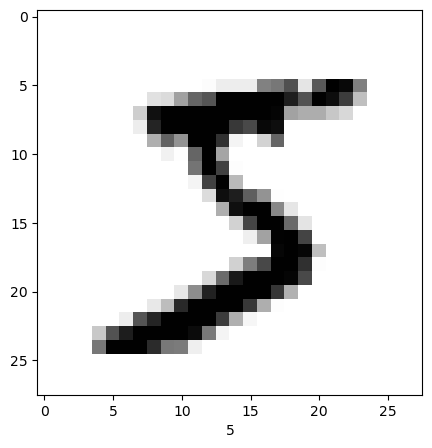

In [85]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xlabel(str(train_labels[0]))
plt.show()

Here in the next three cells, the pixel values of the images are normalized to fall within the range [0, 1] using Keras’ utility function. After normalization, a sample image and its corresponding numerical array representation are displayed to validate and visualize the effects of normalization on the data.

In [86]:
# b. Scale these values to a range of 0 to 1
#train_images, test_images = train_images / 255.0, test_images / 255.0
#alternatively, another method for normalizing
train_images, test_images =tf.keras.utils.normalize(train_images, axis =1), tf.keras.utils.normalize(test_images, axis =1)

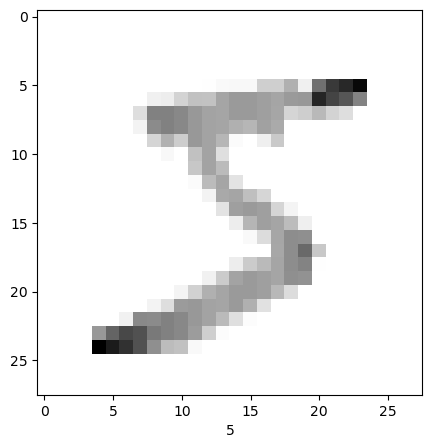

In [87]:
#  Visualize a sample image
plt.figure(figsize=(5,5))
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xlabel(str(train_labels[0]))
plt.show()

In [88]:
#sample datapoint after normalizing
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

The model definition and compilation occur in this block. An MLP model is constructed using two hidden layers, each with 128 neurons and ReLU activation. The model takes 28x28 images as input, flattening them into 1D arrays, and outputs a probability distribution over the 10 digit classes using softmax activation. The model is compiled using the Adam optimizer and sparse categorical crossentropy loss, considering the integer labels.

In [89]:
# a. Build MLP Model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Input layer
    layers.Dense(128, activation='relu'),  # 1st hidden layer
    layers.Dense(128, activation='relu'),  # 2nd hidden layer
    layers.Dense(10, activation='softmax') # Output layer
])
# a. Compile model with required parameters:
# a.1 Loss function: 'sparse_categorical_crossentropy'
# a.2 Optimizer: 'adam'
# a.3 Metrics: ['accuracy']
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

The final block encapsulates model training, prediction, and evaluation:

* The model is trained for 10 epochs using the normalized images and labels.
* Predictions are made for the test set and visualized using a sample image, displaying both predicted and actual labels.
* Finally, the model is evaluated using the test set, and its accuracy and loss on this unseen data are printed, providing a quantitative measure of its performance and predictive capability.

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2659 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1075 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0734 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0541 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0431 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0260 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0219 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0176 - accuracy: 0.9941
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


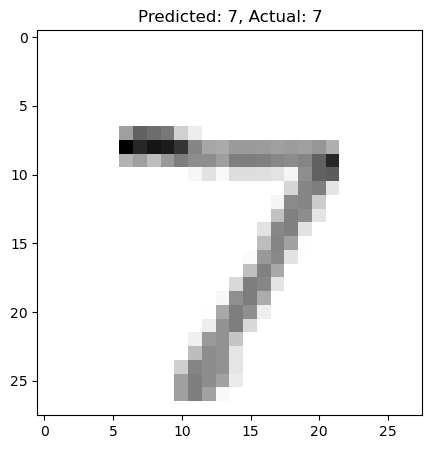

313/313 - 1s - loss: 0.1015 - accuracy: 0.9763 - 595ms/epoch - 2ms/step

Test accuracy: 0.9763000011444092

Test loss: 0.10145018249750137


In [90]:
# a. Feed the training data to the built model
model.fit(train_images, train_labels, epochs=10)

# b. Ask model to make predictions about a test set
predictions = model.predict(test_images)

# c. Verify that the predictions match the labels from the test labels
# Visualize a sample prediction
plt.figure(figsize=(5,5))
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.title("Predicted: " + str(np.argmax(predictions[0])) + ", Actual: " + str(test_labels[0]))
plt.show()

# Evaluate the model accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)